# Face_Detection_using_Haar_Cascades_with_OpenCV

**Name:** YUVARAJ V 

**Reg.No:** 212223230252

**Slot:** 4E6-1  

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread("image_01.png",0)
img2 = cv2.imread("image_02.png",0)
img3 = cv2.imread("image_03.png",0)

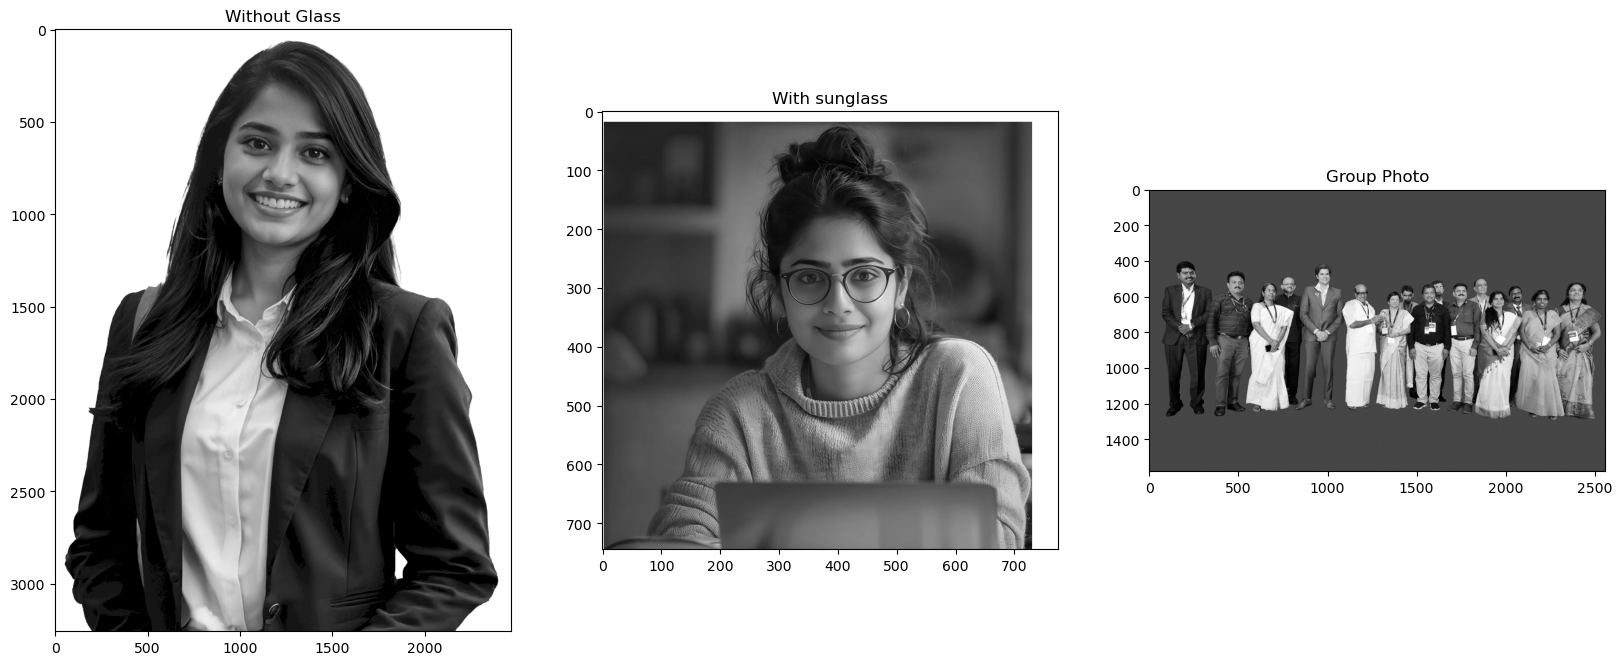

In [3]:
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img1,cmap='gray');plt.title("Without Glass")
plt.subplot(132);plt.imshow(img2,cmap='gray');plt.title("With sunglass")
plt.subplot(133);plt.imshow(img3,cmap='gray');plt.title("Group Photo")
plt.show()

In [4]:
img1_resized = cv2.resize(img1,(1000,1000))
img2_resized = cv2.resize(img2,(1000,1000))
img3_resized = cv2.resize(img3,(1000,1000))

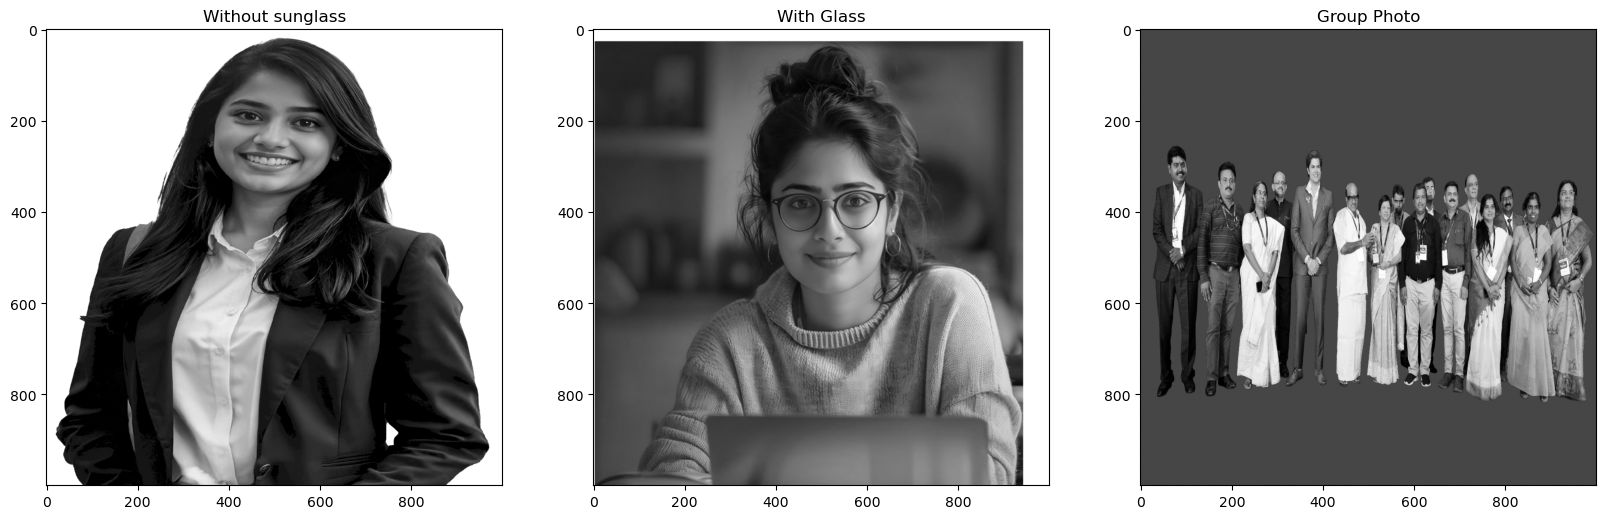

In [5]:
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img1_resized,cmap='gray');plt.title("Without sunglass")
plt.subplot(132);plt.imshow(img2_resized,cmap='gray');plt.title("With Glass")
plt.subplot(133);plt.imshow(img3_resized,cmap='gray');plt.title("Group Photo")
plt.show()

## Face Detection

In [6]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [7]:
def detect_face(img):

    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=5)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (127,0,255), 10)
    return face_img


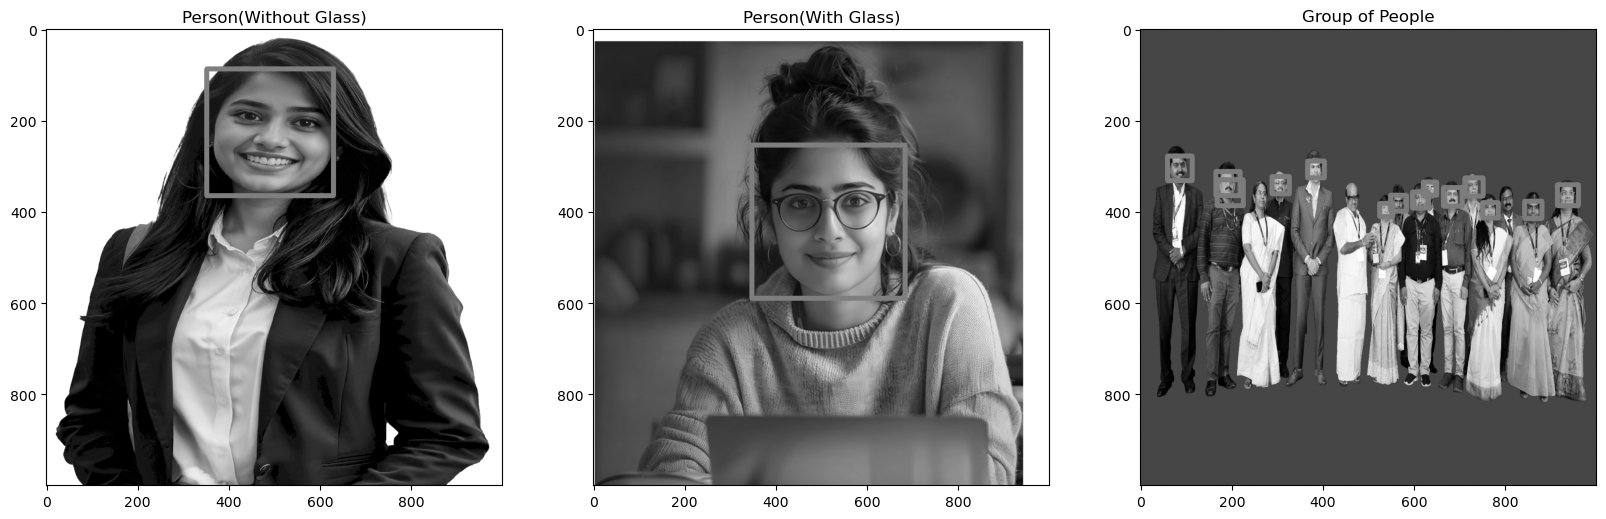

In [8]:
img1_result = detect_face(img1_resized)
img2_result = detect_face(img2_resized)
img3_result = detect_face(img3_resized)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img1_result,cmap='gray');plt.title('Person(Without Glass)');
plt.subplot(132);plt.imshow(img2_result,cmap='gray');plt.title('Person(With Glass)');
plt.subplot(133);plt.imshow(img3_result,cmap='gray');plt.title('Group of People');
plt.show()

In [9]:
img1 = cv2.imread('image_01.png')
img2 = cv2.imread('image_02.png')
img3 = cv2.imread('image_03.png')

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)


## Eye Detection

In [10]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

def detect_eye(img):

    face_img = img.copy()

    face_rects = eye_cascade.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=5)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (0,255,0), 2)
    return face_img

In [11]:
img1_resized = cv2.resize(img1,(600,600))
img2_resized = cv2.resize(img2,(600,600))
img3_resized = cv2.resize(img3,(600,600))

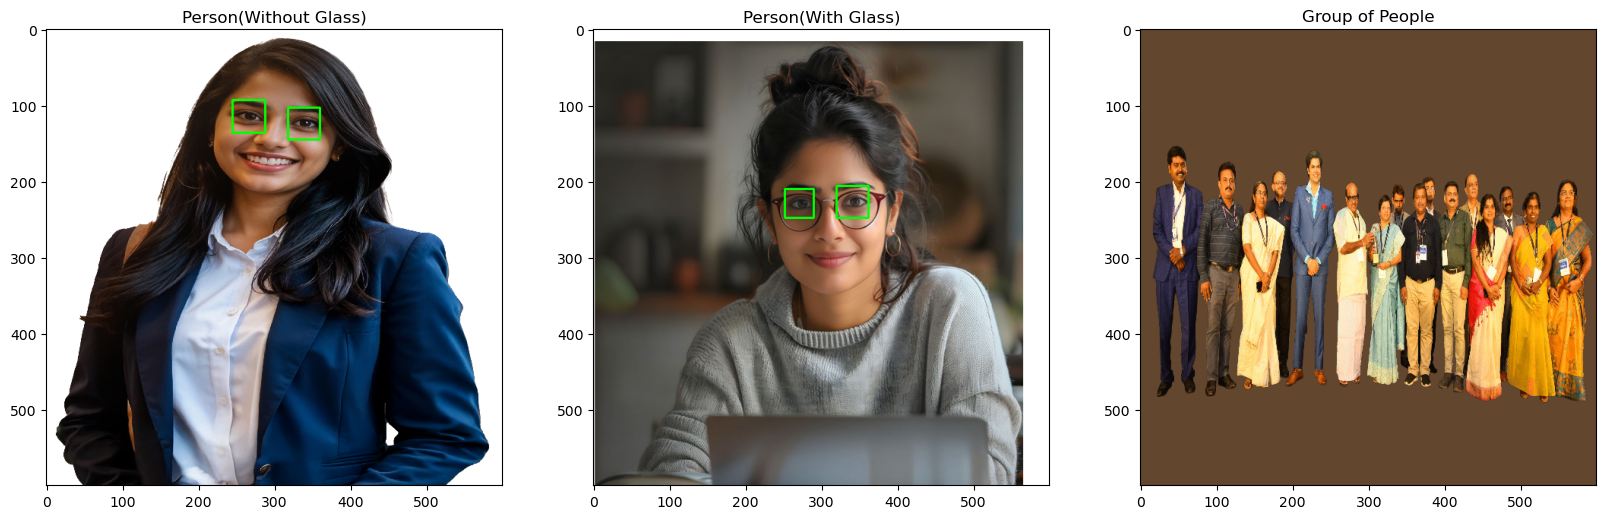

In [12]:
img1_result = detect_eye(img1_resized)
img2_result = detect_eye(img2_resized)
img3_result = detect_eye(img3_resized)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img1_result);plt.title('Person(Without Glass)');
plt.subplot(132);plt.imshow(img2_result);plt.title('Person(With Glass)');
plt.subplot(133);plt.imshow(img3_result);plt.title('Group of People');

## Face Detection on Real-Time Webcam Video

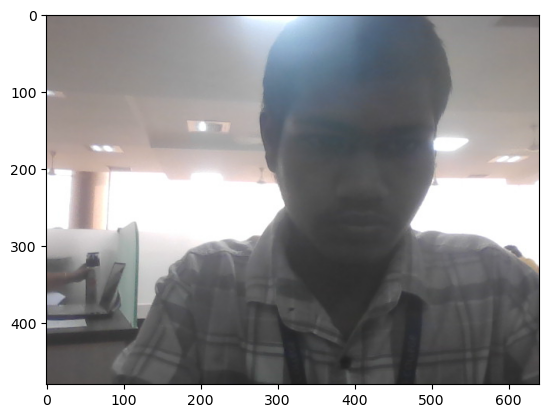

In [15]:
cap = cv2.VideoCapture(0)

while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Can't receive frame")
            break
            
        result = detect_face(frame)
        cv2.imshow("Face Detection Through Webcam", result)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
plt.imshow(result[:,:,::-1])        
cap.release()
cv2.destroyAllWindows()